In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv', names = ["#A","B","#C","D","#E","F","G","H","I","J","#K","#L","#M","N","O"], header = None)

In [3]:
df = df[~df.eq("?").any(1)]

C:\Anaconda\2\envs\cobra\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [4]:
df.head()

,#A,B,#C,D,#E,F,G,H,I,J,#K,#L,#M,N,O
0,39,A0,77516,B0,13,C0,D0,E0,F0,G0,2174,0,40,H0,SMALL
1,50,A1,83311,B0,13,C1,D1,E1,F0,G0,0,0,13,H0,SMALL
2,38,A2,215646,B1,9,C2,D2,E0,F0,G0,0,0,40,H0,SMALL
3,53,A2,234721,B2,7,C1,D2,E1,F1,G0,0,0,40,H0,SMALL
4,28,A2,338409,B0,13,C1,D3,E2,F1,G1,0,0,40,H1,SMALL


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
#A    30162 non-null int64
B     30162 non-null object
#C    30162 non-null int64
D     30162 non-null object
#E    30162 non-null int64
F     30162 non-null object
G     30162 non-null object
H     30162 non-null object
I     30162 non-null object
J     30162 non-null object
#K    30162 non-null int64
#L    30162 non-null int64
#M    30162 non-null int64
N     30162 non-null object
O     30162 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,#A,#C,#E,#K,#L,#M
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df['O'].value_counts()

SMALL    22654
LARGE     7508
Name: O, dtype: int64

In [8]:
df['#A'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 34, 25, 43, 40,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 47, 46,
       36, 79, 27, 18, 33, 76, 55, 61, 70, 64, 71, 66, 51, 58, 26, 17, 60,
       90, 75, 65, 77, 62, 63, 67, 74, 72, 69, 68, 73, 81, 78, 88, 80, 84,
       83, 85, 82, 86], dtype=int64)

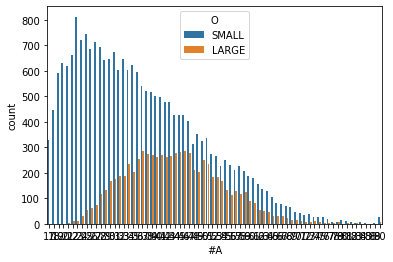

In [9]:
sns.countplot('#A', hue = 'O', data = df )

In [10]:
df['B'].unique()

array(['A0', 'A1', 'A2', 'A3', 'A4', 'A6', 'A7'], dtype=object)

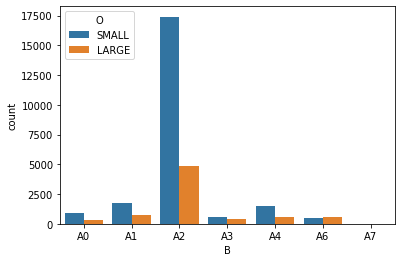

In [11]:
sns.countplot('B', hue = 'O', data = df )

In [12]:
df['#C'].unique()

array([ 77516,  83311, 215646, ...,  84661, 257302, 201490], dtype=int64)

In [13]:
df['#C'].value_counts()

203488    13
113364    12
164190    12
123011    12
148995    12
          ..
34393      1
288341     1
239415     1
118352     1
229376     1
Name: #C, Length: 20263, dtype: int64

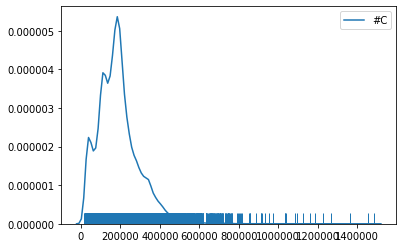

In [14]:
sns.kdeplot(df['#C'])
sns.rugplot(df['#C'])

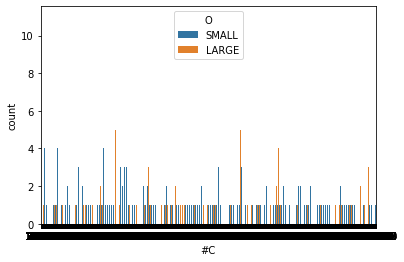

In [15]:
sns.countplot('#C', hue = 'O', data = df )

In [16]:
df['D'].unique()

array(['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B8', 'B9', 'B7', 'B10',
       'B11', 'B12', 'B14', 'B15', 'B13'], dtype=object)

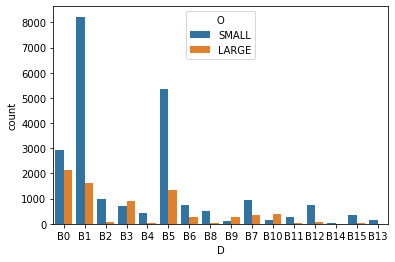

In [17]:
sns.countplot('D', hue = 'O', data = df )

In [18]:
df['#E'].unique()

array([13,  9,  7, 14,  5, 10, 12,  4, 16, 11, 15,  3,  6,  1,  8,  2],
      dtype=int64)

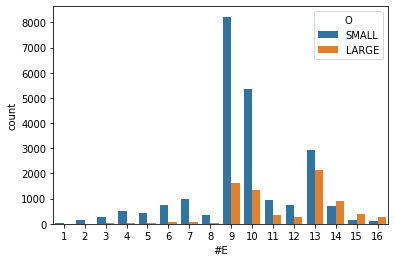

In [19]:
sns.countplot('#E', hue = 'O', data = df )

In [20]:
df['F'].unique()

array(['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6'], dtype=object)

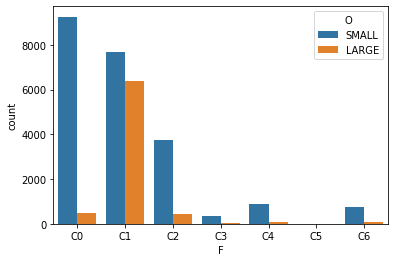

In [21]:
sns.countplot('F', hue = 'O', data = df )

In [22]:
df[(df['F'] == 'C5') & (df['O'] == 'SMALL')].count()

#A    11
B     11
#C    11
D     11
#E    11
F     11
G     11
H     11
I     11
J     11
#K    11
#L    11
#M    11
N     11
O     11
dtype: int64

In [23]:
df[(df['F'] == 'C5') & (df['O'] == 'LARGE')].count()

#A    10
B     10
#C    10
D     10
#E    10
F     10
G     10
H     10
I     10
J     10
#K    10
#L    10
#M    10
N     10
O     10
dtype: int64

In [24]:
df[df['F'] == 'C3'].count()

#A    370
B     370
#C    370
D     370
#E    370
F     370
G     370
H     370
I     370
J     370
#K    370
#L    370
#M    370
N     370
O     370
dtype: int64

In [25]:
df['G'].unique()

array(['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D7', 'D8', 'D9', 'D10', 'D6',
       'D12', 'D13', 'D14'], dtype=object)

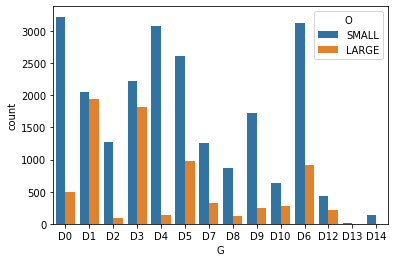

In [26]:
sns.countplot('G', hue = 'O', data = df )

In [27]:
df[df['G'] == 'D13'].count()

#A    9
B     9
#C    9
D     9
#E    9
F     9
G     9
H     9
I     9
J     9
#K    9
#L    9
#M    9
N     9
O     9
dtype: int64

In [28]:
df[df['G'] == 'D14'].count()

#A    143
B     143
#C    143
D     143
#E    143
F     143
G     143
H     143
I     143
J     143
#K    143
#L    143
#M    143
N     143
O     143
dtype: int64

In [29]:
df['H'].unique()

array(['E0', 'E1', 'E2', 'E3', 'E4', 'E5'], dtype=object)

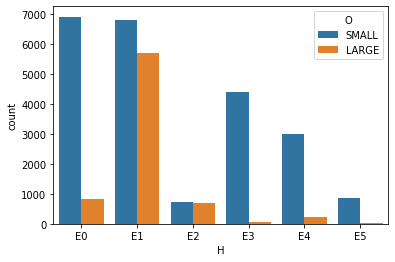

In [30]:
sns.countplot('H', hue = 'O', data = df )

In [31]:
df['I'].unique()

array(['F0', 'F1', 'F2', 'F3', 'F4'], dtype=object)

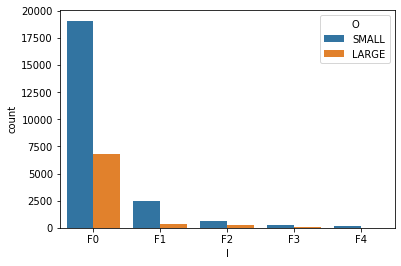

In [32]:
sns.countplot('I', hue = 'O', data = df )

In [33]:
df['J'].unique()

array(['G0', 'G1'], dtype=object)

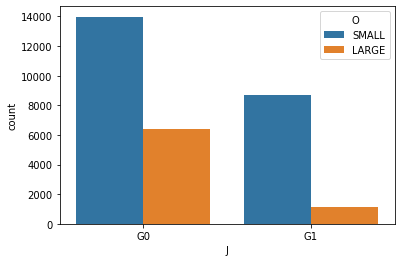

In [34]:
sns.countplot('J', hue = 'O', data = df )

In [35]:
df['#K'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
        4064,  4386,  7298,  1409,  3674,  1055,  2050,  2176,   594,
       20051,  6849,  4101,  8614,  3411,  2597, 25236,  4650,  2463,
        3103, 10605,  2964,  3325,  2580,  3471,  4865, 99999,  6514,
        1471,  2329,  2105,  2885, 10520,  2202,  2961, 27828,  6767,
        2228,  1506, 13550,  2635,  5556,  4787,  3781,  3137,  3818,
         914,   401,  2829,  2977,  4934,  2062,  2354,  3464,  5455,
       15020,  1424,  3273, 22040,  4416, 10566,  4931,  7430, 34095,
        6497,  3908,   114,  2346,  2907,  1151,  9386,  2414,  2290,
        3418, 15831, 41310,  4508,  2538,  3456,  1848,  3887,  7896,
        5721,  9562,  6418,  1455,  2036,  3942,  1831, 11678,  2936,
        2993,  7443,  6360,  4687,  1797,  6723,  2009,  3432,  6097,
        1639,  2653, 18481, 25124,  7978,   991,  1173,  2387,  5060,
        1086], dtype=int64)

In [36]:
df[df['#K'] > 0].count()

#A    2538
B     2538
#C    2538
D     2538
#E    2538
F     2538
G     2538
H     2538
I     2538
J     2538
#K    2538
#L    2538
#M    2538
N     2538
O     2538
dtype: int64

In [37]:
dfkAbove = df[df['#K'] > 0]
dfkAbove.shape[0]

2538

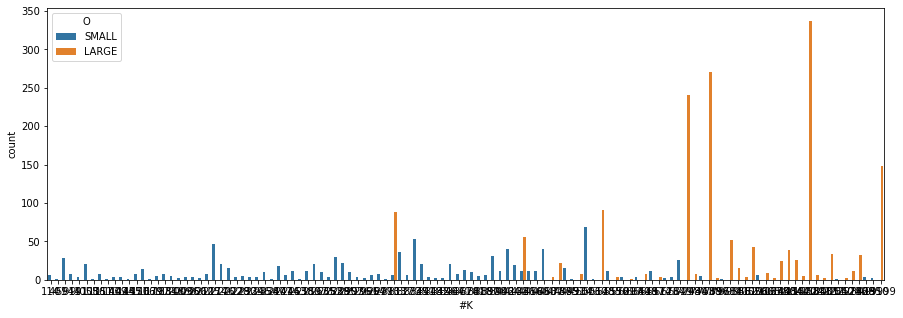

In [38]:
plt.figure(figsize=(15,5))
sns.countplot('#K', hue = 'O', data = dfkAbove )

In [39]:
dfkBelow = df[df['#K'] == 0]
dfkBelow.shape[0]

27624

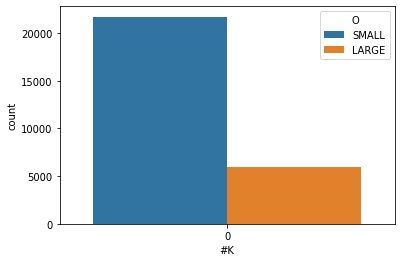

In [40]:
sns.countplot('#K', hue = 'O', data = dfkBelow )

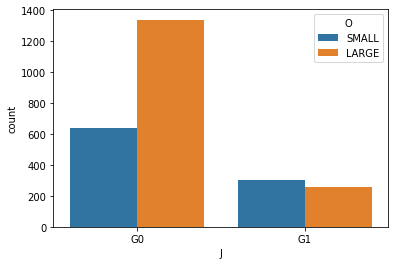

In [41]:
sns.countplot('J', hue = 'O', data = dfkAbove )

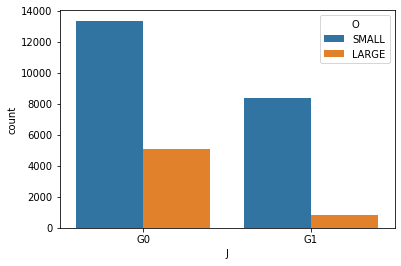

In [42]:
sns.countplot('J', hue = 'O', data = dfkBelow )

In [43]:
df['#L'].unique()

array([   0, 2042, 1408, 1902, 1887, 1719, 1762, 1564, 2179, 1816, 1980,
       1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721, 2051,
       2377, 1669, 2352, 1672,  653, 2392, 1504, 1590, 1651, 1628, 1848,
       2001, 1740, 2002, 1579, 2258, 1602, 2547, 2205, 1726, 2444, 1138,
       2238,  625,  213, 1539,  880, 1668, 1092, 1594, 2231, 1844,  810,
       2824, 2559, 2057, 1573, 1974,  974, 2174, 2149, 1735, 1258, 2603,
       2282,  323, 2246, 1617, 1648, 1825, 3770, 1755, 3683, 2129, 4356,
       2267, 2080, 2457,  419,  155, 3900, 2201, 1944, 2467, 2754, 2472,
       3004, 1411], dtype=int64)

In [44]:
df[df['#L'] > 0].count()

#A    1427
B     1427
#C    1427
D     1427
#E    1427
F     1427
G     1427
H     1427
I     1427
J     1427
#K    1427
#L    1427
#M    1427
N     1427
O     1427
dtype: int64

In [45]:
dfLAbove = df[df['#L'] > 0]
dfLAbove.shape[0]

1427

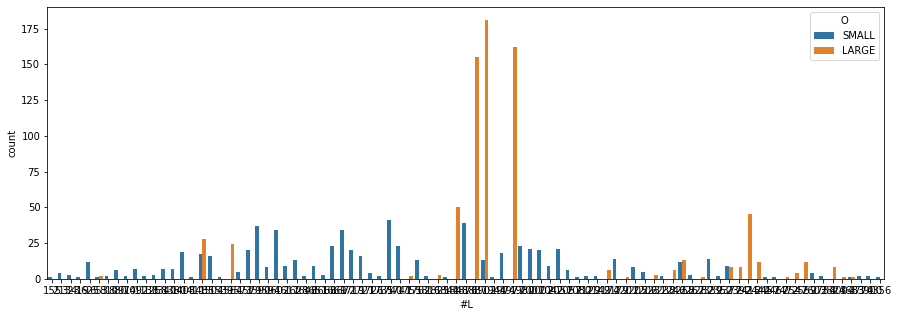

In [46]:
plt.figure(figsize=(15,5))
sns.countplot('#L', hue = 'O', data = dfLAbove )

In [47]:
dfLBelow = df[df['#L'] == 0]
dfLBelow.shape[0]

28735

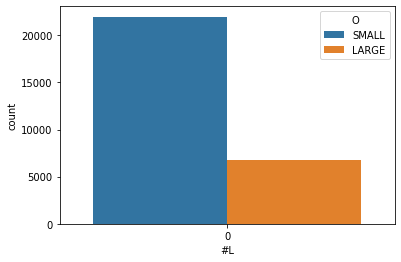

In [48]:
sns.countplot('#L', hue = 'O', data = dfLBelow )

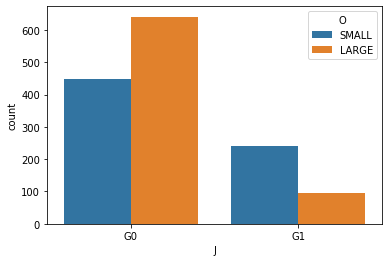

In [49]:
sns.countplot('J', hue = 'O', data = dfLAbove )

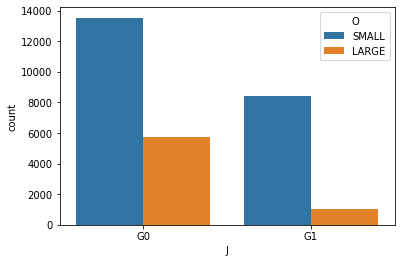

In [50]:
sns.countplot('J', hue = 'O', data = dfLBelow )

In [51]:
df['#M'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 43, 38, 55,
       48, 58, 32, 70, 22, 56, 41, 28, 36, 24, 46,  2, 42, 12, 65,  1, 34,
       75, 98, 33, 54, 10,  6, 64, 19, 18, 72,  8,  9, 47, 37, 21, 26, 14,
        5,  7, 99, 53, 39, 62, 59, 57, 78, 90, 66, 11, 49, 84, 17, 68,  3,
       27, 85, 31, 51, 77, 63, 23,  4, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

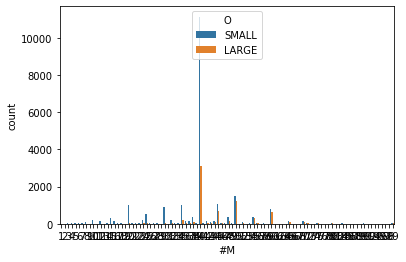

In [52]:
sns.countplot('#M', hue = 'O', data = df)

In [53]:
df['N'].unique()

array(['H0', 'H1', 'H2', 'H3', 'H5', 'H7', 'H8', 'H9', 'H10', 'H11',
       'H12', 'H13', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21',
       'H22', 'H23', 'H24', 'H25', 'H26', 'H27', 'H14', 'H28', 'H6',
       'H29', 'H30', 'H31', 'H32', 'H33', 'H34', 'H35', 'H36', 'H37',
       'H38', 'H39', 'H40', 'H41'], dtype=object)

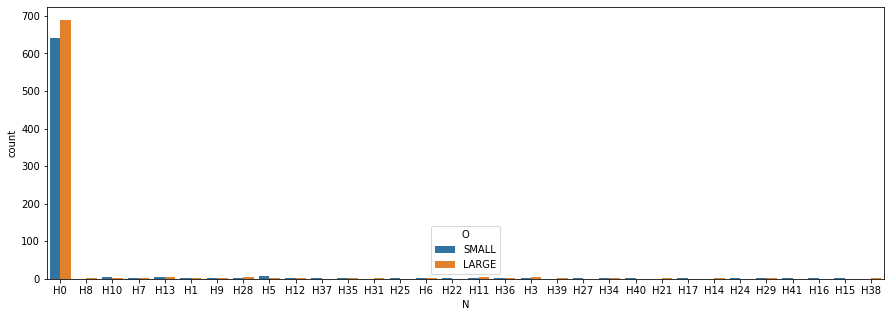

In [54]:
plt.figure(figsize=(15,5))
sns.countplot('N', hue = 'O', data = dfLAbove )

In [55]:
ddfnh = df[df['N'] == 'H0']
ddfnh.shape[0]

27504

In [56]:
sns.countplot('N', hue = 'O', data = dfnh)

NameError: name 'dfnh' is not defined

In [ ]:
dfnh1 = df[df['N'] != 'H0']
plt.figure(figsize=(15,5))
sns.countplot('N', hue = 'O', data = dfnh1)

In [ ]:
sns.countplot('G', hue = 'O', data = dfkAbove )

In [ ]:
sns.countplot('G', hue = 'O', data = dfLAbove )

In [ ]:
sns.countplot('G', hue = 'O', data = dfkBelow)

In [ ]:
sns.countplot('G', hue = 'O', data = dfLBelow)

In [ ]:
sns.countplot('G', hue = 'O', data = df)

In [ ]:
dfLBelow.shape[0]

In [ ]:
dfcat = df[['B', 'D', 'F', 'G', 'H', 'I', 'J', 'N', 'O']]
dfcat.head()

In [ ]:
#plt.figure(figsize=(10,10))
#sns.pairplot(dfcat,hue='O',palette='coolwarm')

In [ ]:
dfnum = df[['#A', '#C', '#E', '#K', '#L','#M', 'O']]
dfnum.head()

In [ ]:
sns.pairplot(dfnum, hue = 'O', palette = 'coolwarm')